In [19]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib as plt
#matplotlib.use('nbagg')
from matplotlib import style
import seaborn
style.use('seaborn')
import matplotlib.pyplot as plt
import csv
import sqlalchemy
from sqlalchemy import create_engine, Column, Integer, String, Date, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from datetime import datetime


In [20]:
#CREATE ENGINE
engine = create_engine("sqlite:///hawaii.sqlite")

In [21]:
# Declare a Base using `automap_base()`
Base = automap_base()
 # Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
 # Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [22]:
#ASSIGN CLASSES to VARIABLES 
Measurements = Base.classes.measurements
Stations = Base.classes.stations

# PRECIPTATION ANALYSIS

In [23]:
# Create a session
session = Session(engine)

In [24]:
# Display the row's columns and data in dictionary format
prcp = session.query(Measurements).first()
prcp.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a0a4ac278>,
 'date': datetime.date(2010, 1, 1),
 'm_id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [25]:
#CREATE QUERY
precp= session.query(Measurements.date, Measurements.prcp)

In [26]:
#READ QUERY INTO PANDAS AND THEN USE MATPLOT
#https://stackoverflow.com/questions/45523908/how-to-store-results-from-sql-query-and-use-it
#https://stackoverflow.com/questions/12047193/how-to-convert-sql-query-result-to-pandas-data-structure

precp_dates = pd.read_sql_query(precp.statement, engine, index_col = 'date')


TypeError: title() missing 1 required positional argument: 's'

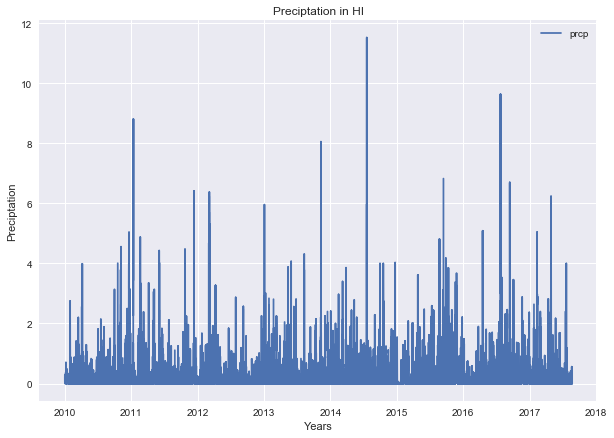

In [27]:
precp_dates.plot(figsize = (10,7))
plt.xlabel('Years')
plt.ylabel('Preciptation')
plt.title('Preciptation in HI')
plt.title()

# STATION & TEMP

In [28]:
# Display the row's columns and data in dictionary format
station = session.query(Stations).first()
station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a0a47f160>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 's_id': 1,
 'station': 'USC00519397'}

In [29]:
#csv - 9 stations
#COUNTING QUERY: https://stackoverflow.com/questions/14754994/why-is-sqlalchemy-count-much-slower-than-the-raw-query
from sqlalchemy import func

In [30]:
count_stations = session.query(Stations.station).group_by(Stations.station).count()

In [31]:
count_stations

9

In [32]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
#Which station has the highest number of observations?
station_activity = session.query(Stations.station, Stations.name, Measurements.station, func.count(Measurements.tobs)).filter(Stations.station == Measurements.station).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).all()


In [33]:
station_activity

[('USC00519281', 'WAIHEE 837.5, HI US', 'USC00519281', 11088),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 'USC00519397', 10896),
 ('USC00513117', 'KANEOHE 838.1, HI US', 'USC00513117', 10836),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 10676),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 'USC00516128', 10448),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'USC00514830',
  8808),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 7916),
 ('USC00517948', 'PEARL CITY, HI US', 'USC00517948', 5488),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 'USC00518838', 2044)]

##MOST ACTIVE: 'USC00519281', 'WAIHEE 837.5, HI US'

In [34]:
mactivity=(('USC00519281', 'WAIHEE 837.5, HI US'))

In [35]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
#Plot the results as a histogram with bins=12.

temp=session.query(Measurements.station, Measurements.tobs).filter(Measurements.station == mactivity[0]).all()

In [36]:
temp

[('USC00519281', 70),
 ('USC00519281', 62),
 ('USC00519281', 74),
 ('USC00519281', 75),
 ('USC00519281', 74),
 ('USC00519281', 76),
 ('USC00519281', 69),
 ('USC00519281', 66),
 ('USC00519281', 70),
 ('USC00519281', 75),
 ('USC00519281', 64),
 ('USC00519281', 60),
 ('USC00519281', 61),
 ('USC00519281', 68),
 ('USC00519281', 64),
 ('USC00519281', 66),
 ('USC00519281', 67),
 ('USC00519281', 70),
 ('USC00519281', 67),
 ('USC00519281', 67),
 ('USC00519281', 69),
 ('USC00519281', 60),
 ('USC00519281', 75),
 ('USC00519281', 75),
 ('USC00519281', 65),
 ('USC00519281', 75),
 ('USC00519281', 69),
 ('USC00519281', 67),
 ('USC00519281', 66),
 ('USC00519281', 69),
 ('USC00519281', 72),
 ('USC00519281', 67),
 ('USC00519281', 65),
 ('USC00519281', 64),
 ('USC00519281', 67),
 ('USC00519281', 67),
 ('USC00519281', 68),
 ('USC00519281', 69),
 ('USC00519281', 66),
 ('USC00519281', 69),
 ('USC00519281', 61),
 ('USC00519281', 71),
 ('USC00519281', 70),
 ('USC00519281', 70),
 ('USC00519281', 66),
 ('USC0051

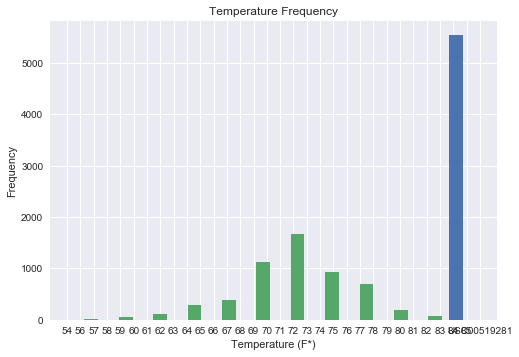

In [37]:
plt.hist(temp, bins=12)
plt.xlabel("Temperature (F*)")
plt.ylabel("Frequency")
plt.title("Temperature Frequency")
plt.show()

# Temperature Analysis




Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
and return the minimum, average, and maximum temperatures for that range of dates.
Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching 
dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.


Use the average temperature as the bar height.
Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [42]:
def calc_temps(start_date, end_date):
    temp = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()